In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

# Functions
from implementations import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)


(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")
data_, data_t_, labels, ids = process_data(data_raw, t_data_raw, labels_raw, ids_raw, zero = False)


The original dimensions of the training data set was 250000 samples and 30 columns. After feature and sample filtering, there are 223877 samples and 23 columns


In [28]:

def hello(times):
    for i in np.arange(times):
        x = 'hello' * i
        yield x
 
okay = hello(4)
next(okay)


def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_val(y, x, k_indices, k, lambda_, degree):
    """get subsets for cross validation"""
    
    k_indices = build_k_indices(labels, k, 0)

    for i in np.arange(k):
        te_indice = k_indices[i]
        tr_indice = np.delete(k_indices, te_indice)
        y_te = y[te_indice]
        y_tr = y[tr_indice]
        x_te = x[te_indice]
        x_tr = x[tr_indice]
        
        # standardize the sets
        
        x_train, mean, variance = standardize(x_tr)
        x_test = standardize_test(x_te, mean, variance)
    
        yield np.array(y_tr), np.array(x_train), np.array(y_te), np.array(x_test) #this is a generator! call next(object) for next set







In [29]:


def least_squares_GD(y, tx, initial_w, tol = 1e-8, max_iters = 10000, gamma = 0.05, k=4,  write = False):
    """Gradient descent algorithm."""
    gen = cross_val(y, tx, k_indices, k, 0.01, 2)
    test_loss = []
    
    for i in np.arange(k):
        y_tr, x_tr, y_te, x_te = next(gen)

        # Define parameters to store w and loss
        ws = [initial_w]
        w = initial_w
        # losses = [compute_loss(y_tr, x_tr, w)]
        # diff = losses[0]
        n_iter=0

        while (n_iter < max_iters): # or (diff > tol):
            # compute gradient
            gd = compute_gradient(y_tr, x_tr, w)
            # compute next w
            w = w - gamma*gd

            # compute loss and diff
            # loss = compute_loss(y_tr, x_tr, w) 
            # diff = abs(loss-losses[-1])

            # store w and loss and increment
            # ws.append(w)
            n_iter += 1

            if write == True:
                print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                      bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
            
        # append the test_loss to the list so it can be averaged at the end
        test_loss.append(compute_loss(y_te, x_te, w))
    return np.array(test_loss).mean()


initial_w = np.zeros(data_.shape[1])
losses = least_squares_GD(labels, data_, initial_w, gamma = 0.0001, max_iters = 20) # fit model and retrieve W's across iterations


/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:27: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [30]:
print(losses)

0.4994044016567428


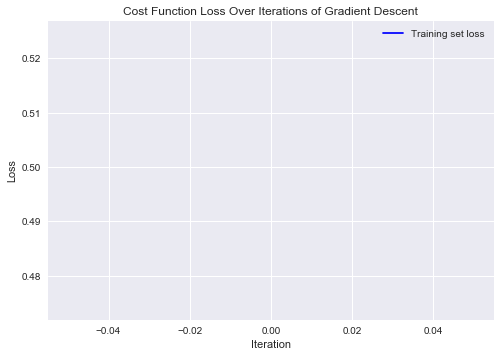

In [34]:

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
# plt.plot(losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cost Function Loss Over Iterations of Gradient Descent')
plt.legend()
plt.show()